# Importing libraries

In [40]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
%matplotlib inline

# Data Exploration and Visualization

In [41]:
df = pd.read_csv("Training Data.csv")
print(df.head())
print(df.info())
df.describe()

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## Checking for data imbalance and attribute corelations

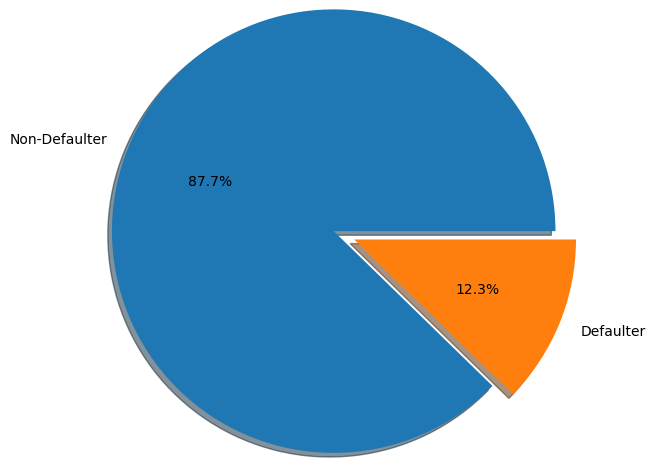

In [42]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

C:\Users\Adam\AppData\Local\Temp\ipykernel_4320\726115684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

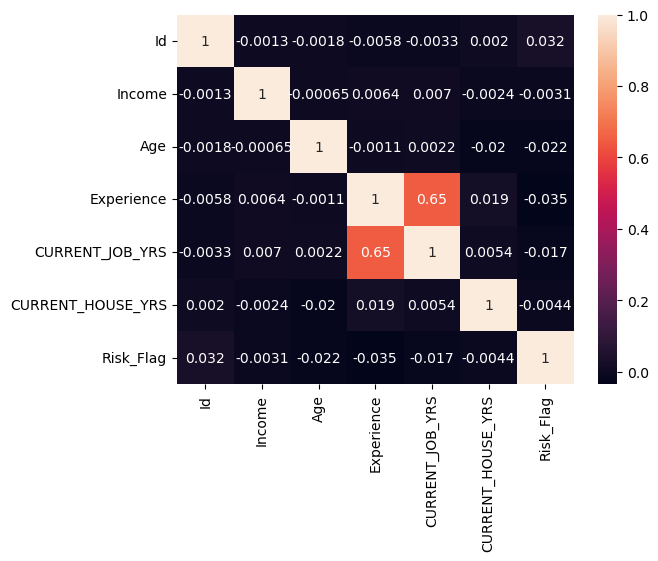

In [43]:
#Shows corelation between variables
sns.heatmap(df.corr(), annot=True)

## Age and Income Analysis

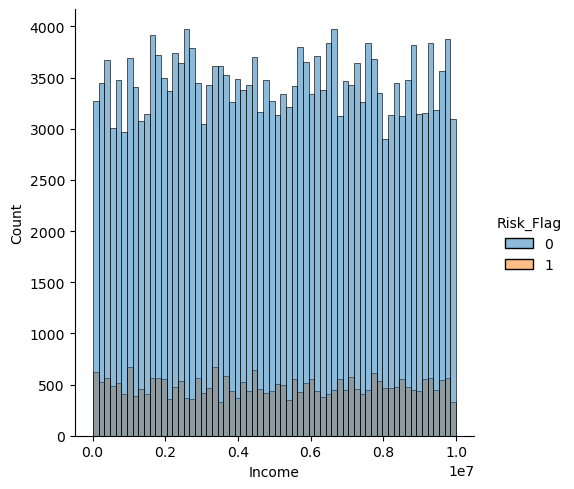

In [44]:
sns.displot(data = df, x = df.Income, hue = df.Risk_Flag)

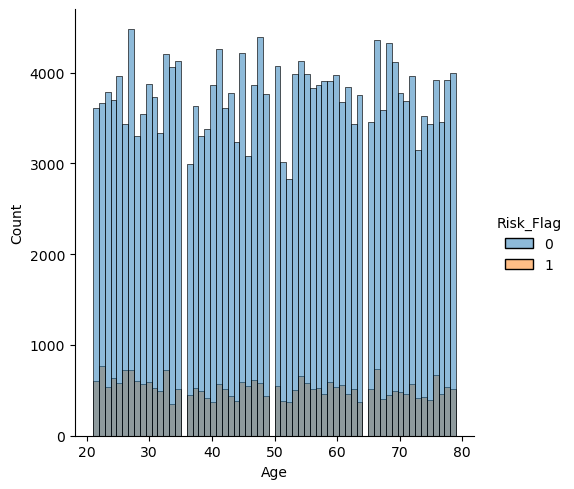

In [45]:
sns.displot(data = df, x = df.Age, hue = df.Risk_Flag)

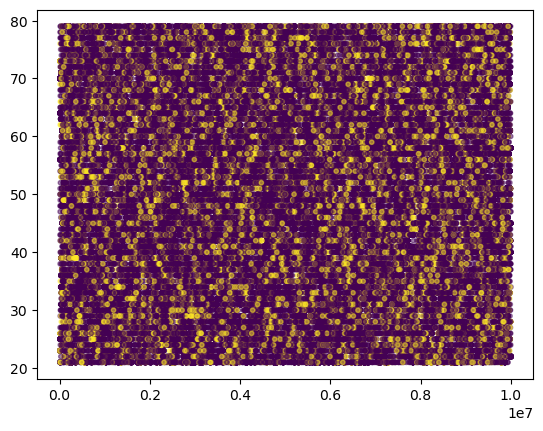

In [46]:
plt.scatter(df.Income, df.Age, c = df.Risk_Flag, alpha = 0.5, s = 10)

In [47]:
df.groupby("Age")["Income"].agg(["min", "max", "mean", "median"]).sort_values(by="median", ascending=False).T

Age,70,26,61,55,24,60,63,74,75,43,...,66,52,32,28,54,27,45,73,64,33
min,1.031000e+04,2.183100e+04,5.412800e+04,3.878300e+04,1.749600e+04,3.564200e+04,2.856100e+04,4.017000e+04,2.516100e+04,1.379200e+04,...,1.821500e+04,1.944800e+04,3.677500e+04,3.923100e+04,1.322000e+04,1.173500e+04,6.210000e+04,1.111400e+04,1.260800e+04,3.972400e+04
max,9.968900e+06,9.994518e+06,9.990505e+06,9.987388e+06,9.996192e+06,9.995445e+06,9.990973e+06,9.992098e+06,9.977117e+06,9.990776e+06,...,9.994882e+06,9.976620e+06,9.972303e+06,9.985964e+06,9.974540e+06,9.989145e+06,9.996969e+06,9.992141e+06,9.990182e+06,9.986330e+06
mean,5.340008e+06,5.385543e+06,5.659666e+06,5.539477e+06,5.250239e+06,5.204934e+06,5.337267e+06,5.355669e+06,5.293195e+06,5.249430e+06,...,4.878896e+06,4.944646e+06,4.585012e+06,4.880282e+06,4.793953e+06,4.870938e+06,4.560202e+06,4.340876e+06,4.235114e+06,4.268326e+06
median,6.000177e+06,5.830799e+06,5.817501e+06,5.660425e+06,5.645786e+06,5.644262e+06,5.633671e+06,5.574828e+06,5.541889e+06,5.531708e+06,...,4.592797e+06,4.570117e+06,4.552514e+06,4.514928e+06,4.496905e+06,4.476997e+06,4.468065e+06,4.171960e+06,4.036559e+06,3.763510e+06


## Property Analysis

<Axes: xlabel='Car_Ownership', ylabel='count'>

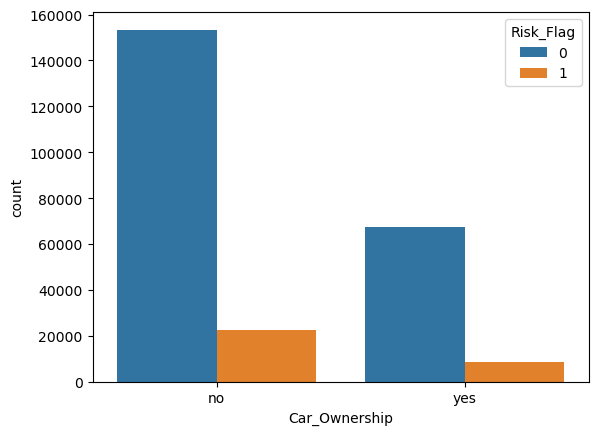

In [48]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df)

<Axes: xlabel='House_Ownership', ylabel='count'>

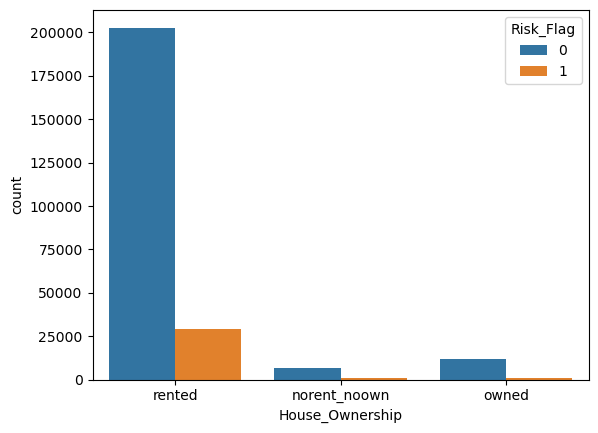

In [49]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)

<Axes: xlabel='Married/Single', ylabel='count'>

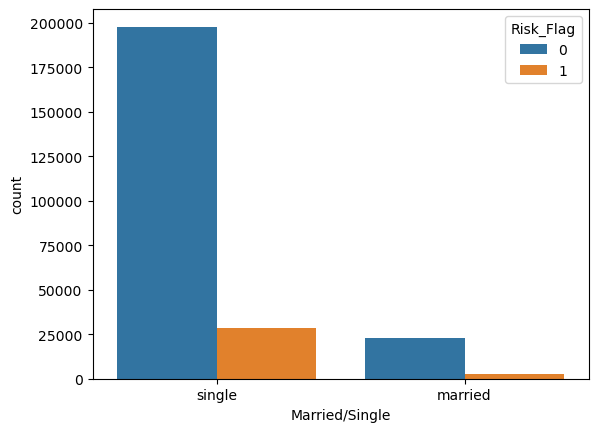

In [50]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)

## Profession Analysis

In [51]:
print(df.Profession.unique()[:10])
len(df.Profession.unique())

['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician']


51

In [52]:
df.groupby("Profession")["Income"].agg(["min", "max", "mean", "median"]).sort_values(by="median", ascending=False).T

Profession,Designer,Petroleum_Engineer,Scientist,Psychologist,Surveyor,Financial_Analyst,Firefighter,Librarian,Mechanical_engineer,Chemical_engineer,...,Design_Engineer,Statistician,Physician,Civil_engineer,Flight_attendant,Chef,Magistrate,Drafter,Official,Police_officer
min,1.284100e+04,2.292100e+04,1.379200e+04,3.322400e+04,1.111400e+04,1.766000e+04,2.938000e+04,2.533100e+04,3.705700e+04,2.692600e+04,...,4.476100e+04,3.170500e+04,1.260800e+04,2.567400e+04,1.169500e+04,1.173500e+04,1.621200e+04,1.493600e+04,1.362900e+04,1.322000e+04
max,9.996946e+06,9.968353e+06,9.975985e+06,9.985964e+06,9.994518e+06,9.990776e+06,9.980725e+06,9.999400e+06,9.990505e+06,9.984718e+06,...,9.962923e+06,9.996861e+06,9.987805e+06,9.992141e+06,9.979070e+06,9.977117e+06,9.982430e+06,9.999180e+06,9.993041e+06,9.999938e+06
mean,5.336802e+06,5.443310e+06,5.282710e+06,5.357795e+06,5.112352e+06,5.145753e+06,5.046134e+06,5.007590e+06,5.175032e+06,5.189805e+06,...,4.840221e+06,5.028648e+06,4.780384e+06,4.755441e+06,4.592177e+06,4.839915e+06,4.769920e+06,4.654805e+06,4.737617e+06,4.502916e+06
median,5.543454e+06,5.541889e+06,5.539704e+06,5.506236e+06,5.495039e+06,5.456293e+06,5.453088e+06,5.384499e+06,5.351331e+06,5.330432e+06,...,4.756143e+06,4.750625e+06,4.683990e+06,4.613553e+06,4.608251e+06,4.568179e+06,4.510519e+06,4.358383e+06,4.353927e+06,4.147754e+06


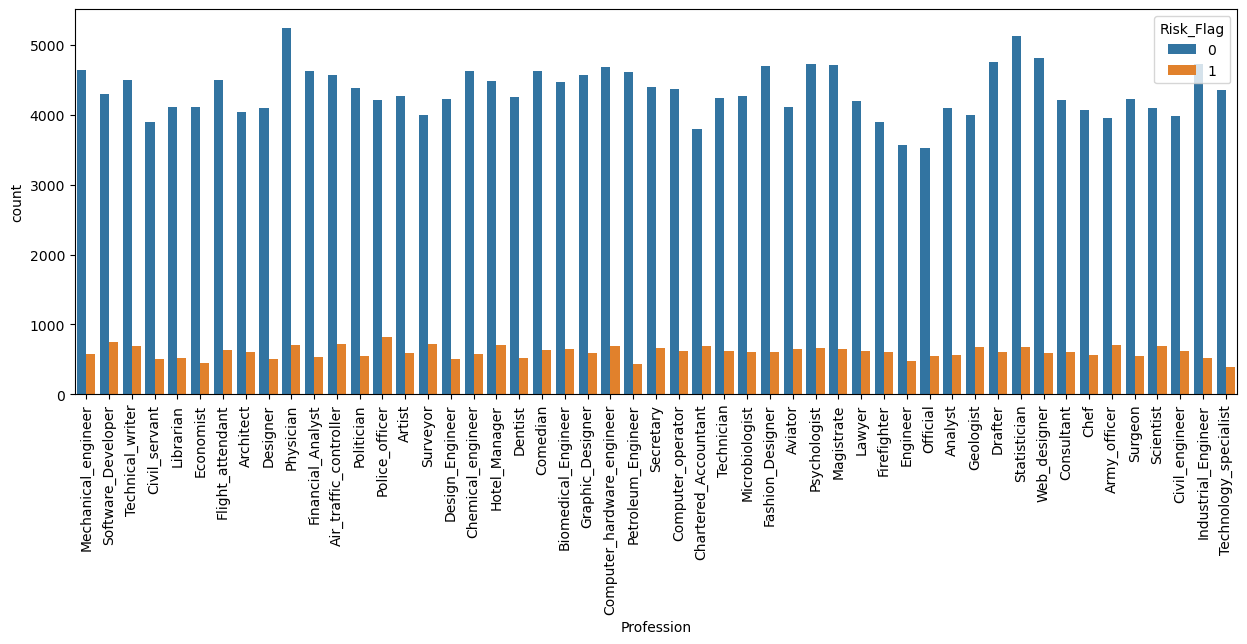

In [53]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="vertical")
sns.countplot(x="Profession", data=df, hue=df.Risk_Flag )
plt.show()

## Geographical Analysis

In [54]:
#Example of some states and total number of unique states
df.STATE = df.STATE.str.extract("([A-Za-z]+)")
print(df.STATE.unique()[:10])
len(df.STATE.unique())

['Madhya' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil' 'Gujarat' 'Rajasthan'
 'Telangana' 'Bihar' 'Andhra']


28

In [55]:
#Example of some cities and total number of unique cities
df.CITY = df.CITY.str.extract("([A-Za-z]+)")
print(df.CITY.unique()[:10])
len(df.CITY.unique())

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar']


316

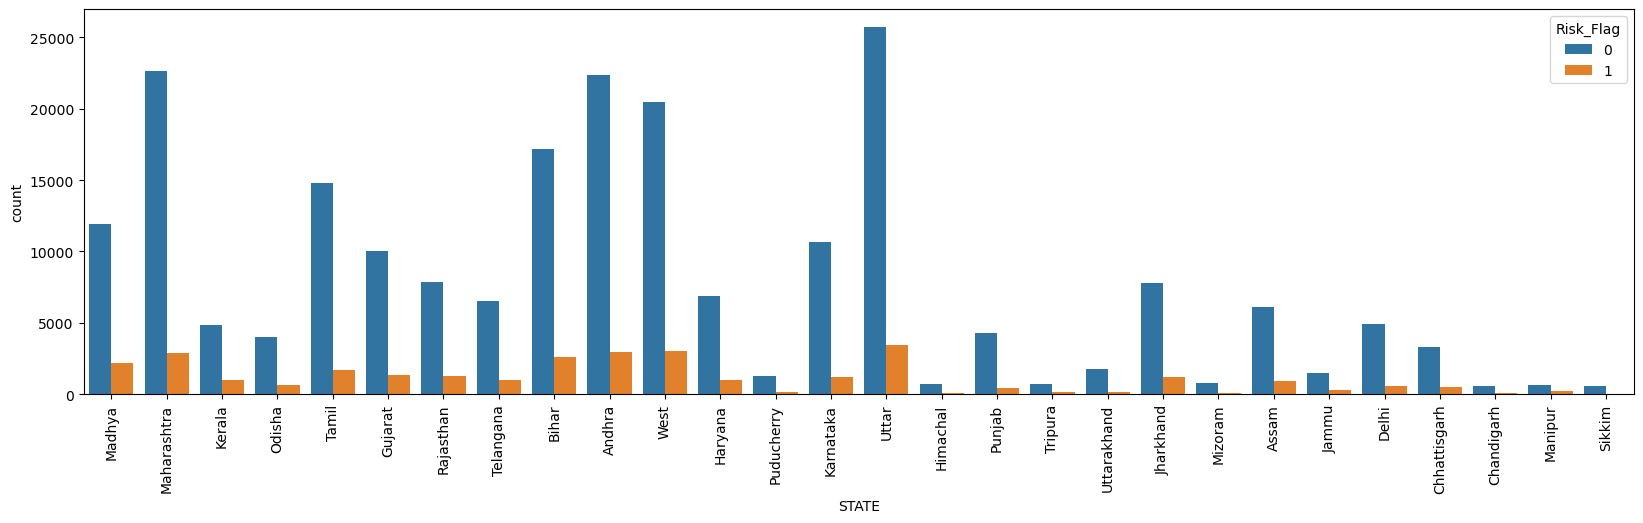

STATE,Manipur,Tripura,Kerala,Jammu,Madhya,Odisha,Rajasthan,Jharkhand,Chhattisgarh,Himachal,...,Andhra,Maharashtra,Mizoram,Delhi,Tamil,Karnataka,Chandigarh,Punjab,Uttarakhand,Sikkim
Risk_Flag,21.55477,16.810878,16.709733,15.898876,15.436907,14.255045,14.083279,13.329615,13.328117,13.32533,...,11.602166,11.325405,11.071849,10.455373,10.316261,10.029523,9.29878,9.004237,7.097118,4.605263


In [56]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical")
sns.countplot(x="STATE", data=df, hue=df.Risk_Flag)
plt.show()

# The average risk percentage of each state
df.groupby("STATE").Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

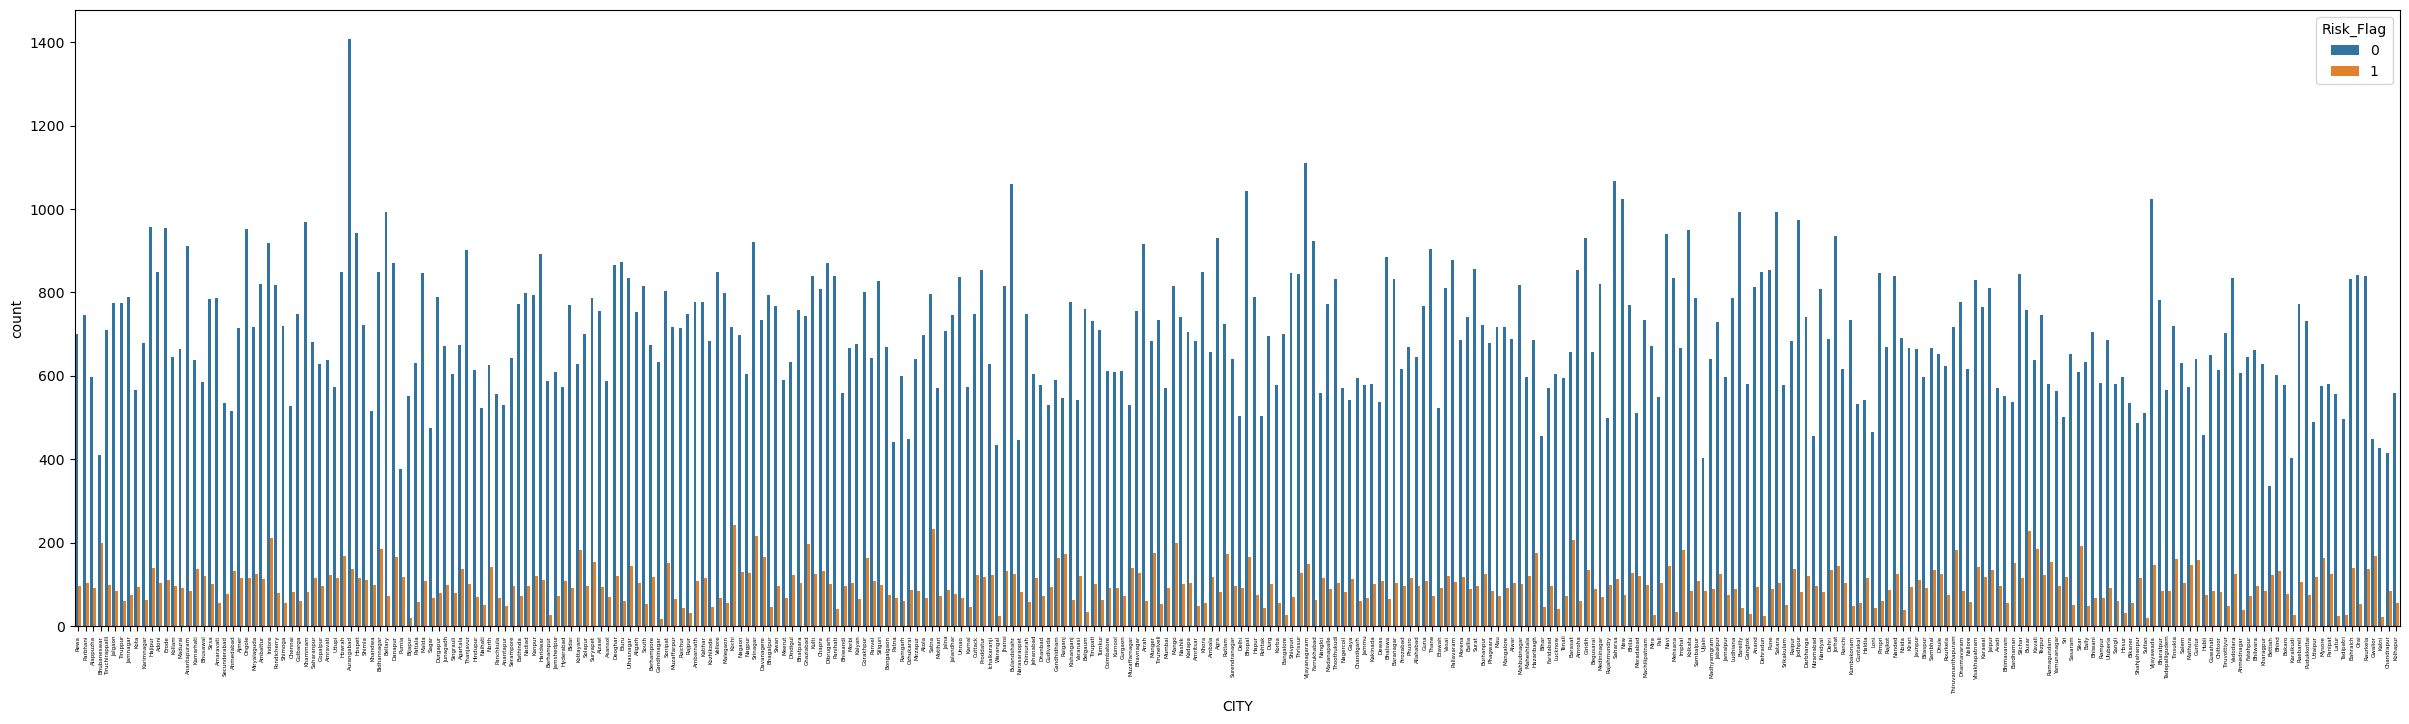

CITY,Bhubaneswar,Gwalior,Bettiah,Kochi,Raiganj,Purnia,Barasat,Sikar,Buxar,Satna,...,Belgaum,Latur,Mehsana,Mira,Rajpur,Bangalore,Bijapur,Sultan,Dehradun,Gandhinagar
Risk_Flag,32.61944,27.272727,26.695842,25.28616,23.955432,23.88664,23.87022,23.845194,23.147208,22.568093,...,4.166667,3.965517,3.917051,3.862661,3.856041,3.713893,3.496503,3.409091,2.634593,2.611367


In [57]:
plt.figure(figsize=(30,8))
plt.xticks(rotation="vertical", size=4)
sns.countplot(x="CITY", data=df, hue=df.Risk_Flag)
plt.show()

# The average risk percentage of each city
df.groupby(["CITY"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

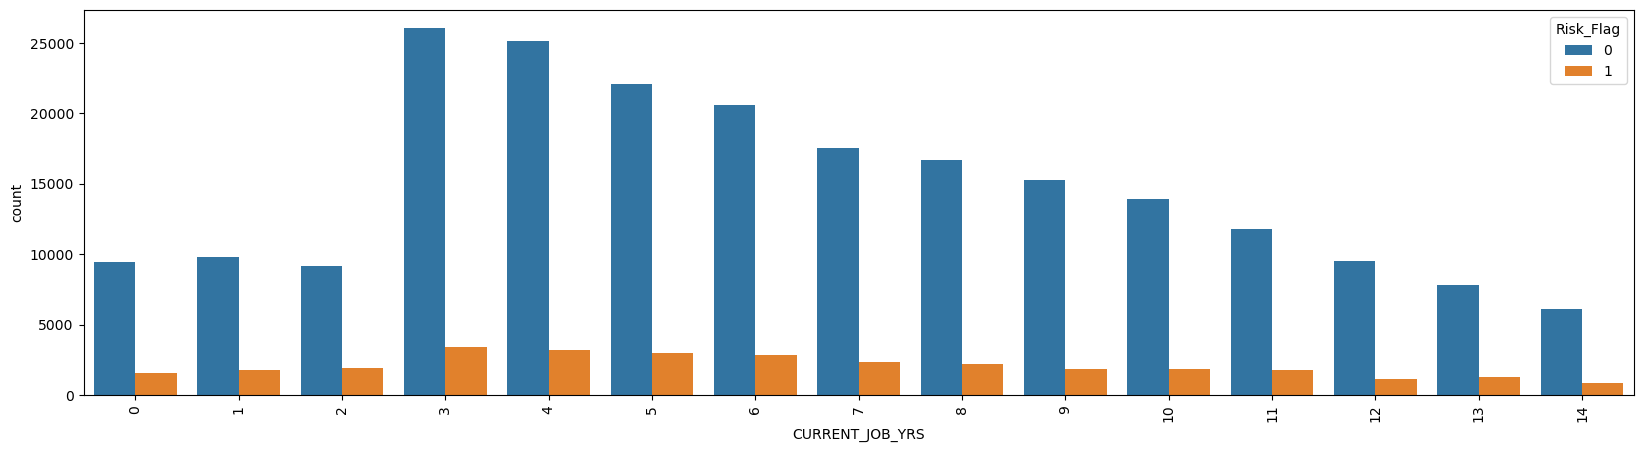

In [58]:
plt.figure(figsize=(20,5))
plt.xticks(rotation="vertical")
sns.countplot(x="CURRENT_JOB_YRS", data=df, hue=df.Risk_Flag)
plt.show()

Text(0, 0.5, 'Years on Current Job')

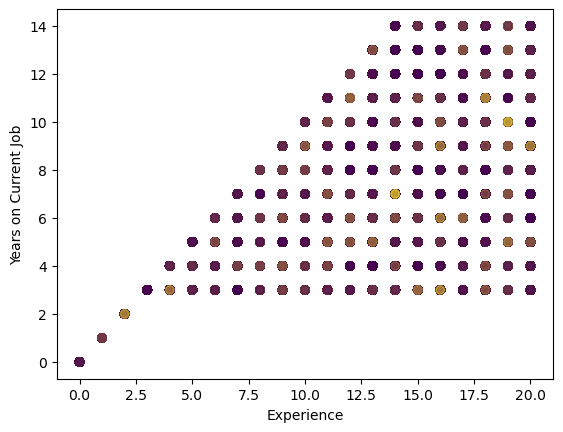

In [59]:
plt.scatter(df.Experience, df.CURRENT_JOB_YRS, c = df.Risk_Flag, alpha = 0.25)
plt.xlabel("Experience")
plt.ylabel("Years on Current Job")

## Data tranformation for ML Methods

In [60]:
df1 = df
features = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
label_encoder = LabelEncoder()

for col in features:
    df1[col] = label_encoder.fit_transform(df[col])

In [61]:
df1 = pd.get_dummies(df1, columns = ["House_Ownership"])
df1.drop(["Id"],axis=1,inplace=True)

In [62]:
df1.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,1,0,33,250,13,3,13,0,0,0,1
1,7574516,40,10,1,0,43,226,14,9,13,0,0,0,1
2,3991815,66,4,0,0,47,8,12,4,10,0,0,0,1
3,6256451,41,2,1,1,43,53,17,2,12,1,0,0,1
4,5768871,47,11,1,0,11,295,22,3,14,1,0,0,1
